In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("outlier_removed.csv")

In [3]:
df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2005-12-12,...,30.0,19.0,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34000,0.83
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-05-26,...,180.0,1000.0,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50000,9.31
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-03-08,...,100.0,500.0,40000.0,51.97,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78000,60.09
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-03-13,...,60.0,31920.0,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06000,191.34
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-02-20,...,60.0,38000.0,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,31163.67625,182.68


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  9964 non-null   object 
 1   PQ #                          9964 non-null   object 
 2   PO / SO #                     9964 non-null   object 
 3   ASN/DN #                      9964 non-null   object 
 4   Country                       9964 non-null   object 
 5   Managed By                    9964 non-null   object 
 6   Fulfill Via                   9964 non-null   object 
 7   Vendor INCO Term              9964 non-null   object 
 8   Shipment Mode                 9964 non-null   object 
 9   PQ First Sent to Client Date  9964 non-null   object 
 10  PO Sent to Vendor Date        9964 non-null   object 
 11  Scheduled Delivery Date       9964 non-null   object 
 12  Delivered to Client Date      9964 non-null   object 
 13  Del

# Hypothesis Testing:


#  1. Checking Correlation

In [6]:
df.corr()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
Unit of Measure (Per Pack),1.000000,-0.237029,-0.159315,0.201532,-0.267414,-0.083370,-0.073960,-0.161485
Line Item Quantity,-0.237029,1.000000,0.789023,-0.337528,-0.268413,0.615014,0.448596,0.779610
Line Item Value,-0.159315,0.789023,1.000000,0.048747,0.054259,0.521220,0.512784,0.982731
Pack Price,0.201532,-0.337528,0.048747,1.000000,0.781071,-0.221641,-0.067271,0.045983
Unit Price,-0.267414,-0.268413,0.054259,0.781071,1.000000,-0.197919,-0.043650,0.052919
Weight (Kilograms),-0.083370,0.615014,0.521220,-0.221641,-0.197919,1.000000,0.496851,0.505006
Freight Cost (USD),-0.073960,0.448596,0.512784,-0.067271,-0.043650,0.496851,1.000000,0.489883
Line Item Insurance (USD),-0.161485,0.779610,0.982731,0.045983,0.052919,0.505006,0.489883,1.000000


<AxesSubplot:>

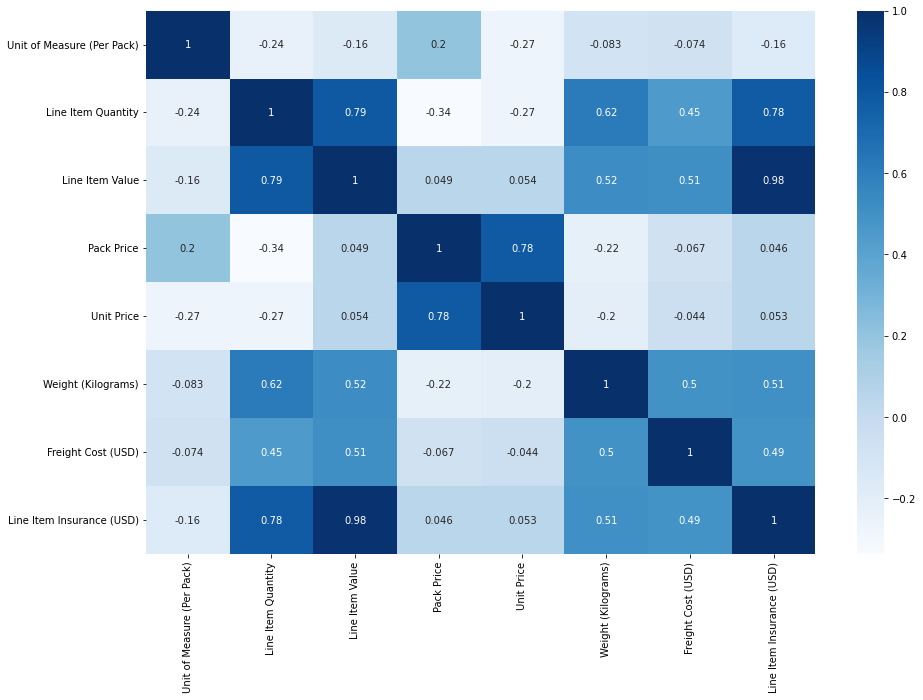

In [8]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, cmap="Blues")

1. **Freight Cost(USD)** has highest correlation with **Line Item Quantity, Line Item values, Weight(KG) and Line Item Insurance(USD)**
2. **Freight Cost(USD)** has least correlation with Unit Of **Measure, Pack Price and unit price**
3. **Line Item Insurance** has highest correlation with Line **Item Quantity and line Item values**
4. Unit price and pack price has least correlation with other columns
5. **Line Item Quantity** has highest correlation with L**ine Item Values around 84%** and **96% with Line Item Insurance**

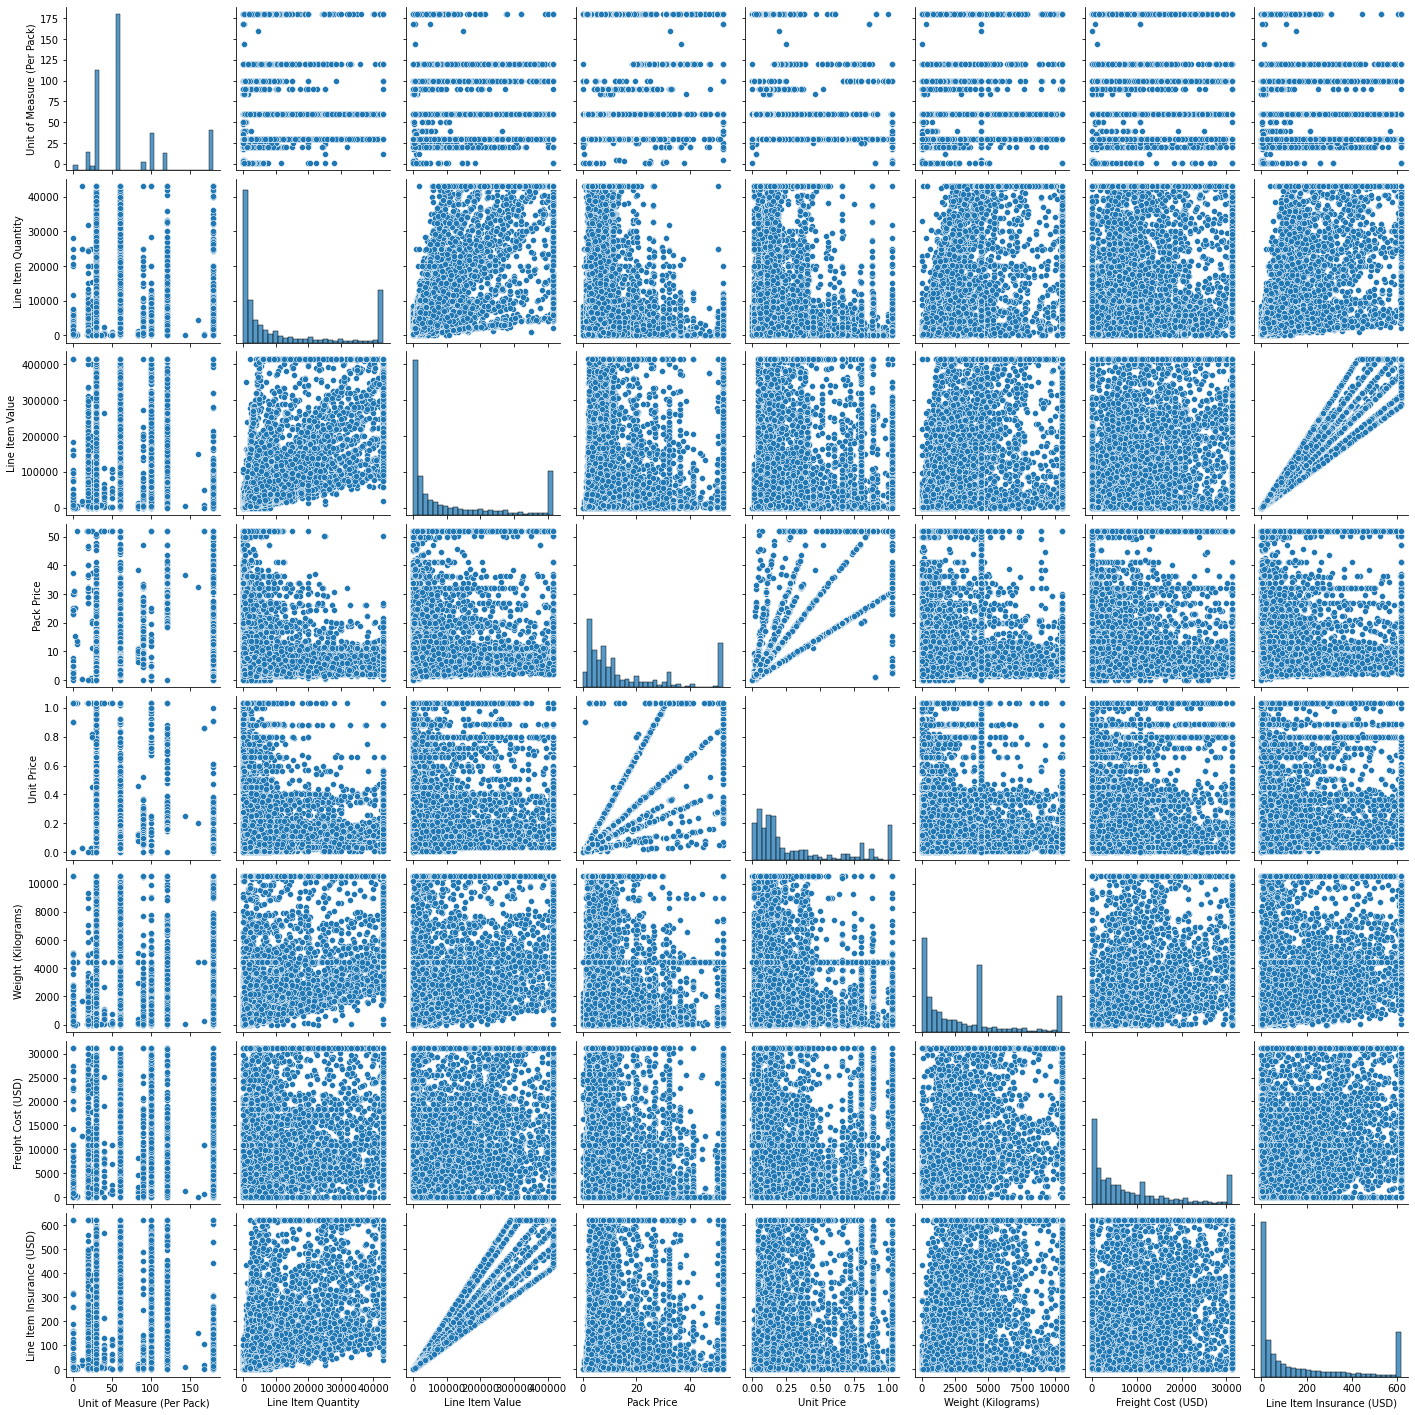

In [9]:
sns.pairplot(df)

In [10]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

# 2. Shapiro Wick Test

In [12]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,Unit of Measure (Per Pack),Not Normally Distributed
1,Line Item Quantity,Not Normally Distributed
2,Line Item Value,Not Normally Distributed
3,Pack Price,Not Normally Distributed
4,Unit Price,Not Normally Distributed
5,Weight (Kilograms),Not Normally Distributed
6,Freight Cost (USD),Not Normally Distributed
7,Line Item Insurance (USD),Not Normally Distributed


# 3. K^2 Normality Test


In [13]:
from scipy.stats import normaltest
normaltest_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,Unit of Measure (Per Pack),Not Normally Distributed
1,Line Item Quantity,Not Normally Distributed
2,Line Item Value,Not Normally Distributed
3,Pack Price,Not Normally Distributed
4,Unit Price,Not Normally Distributed
5,Weight (Kilograms),Not Normally Distributed
6,Freight Cost (USD),Not Normally Distributed
7,Line Item Insurance (USD),Not Normally Distributed


# 4. Spearmanr Test

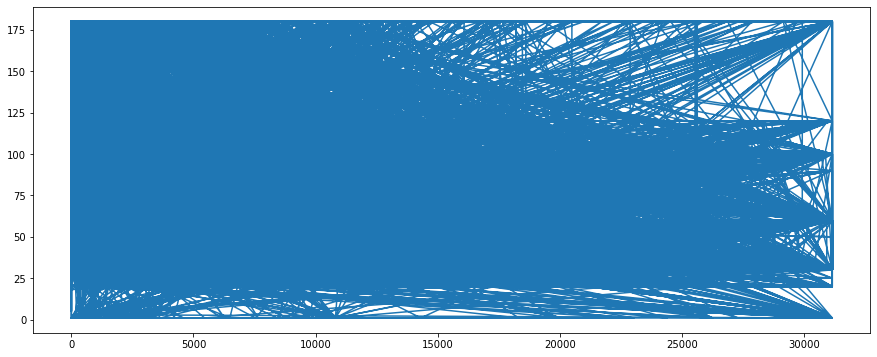

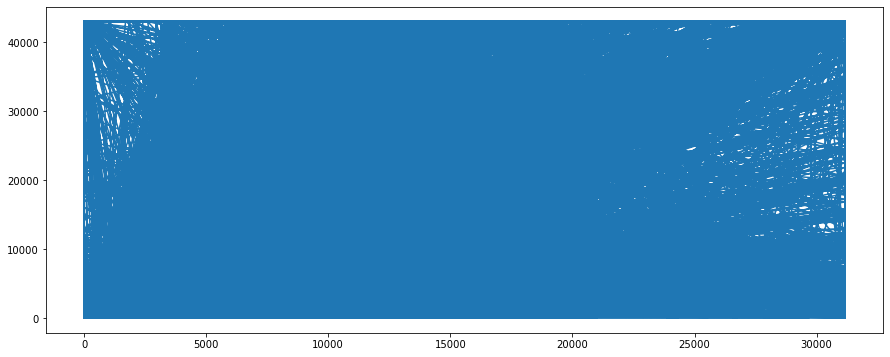

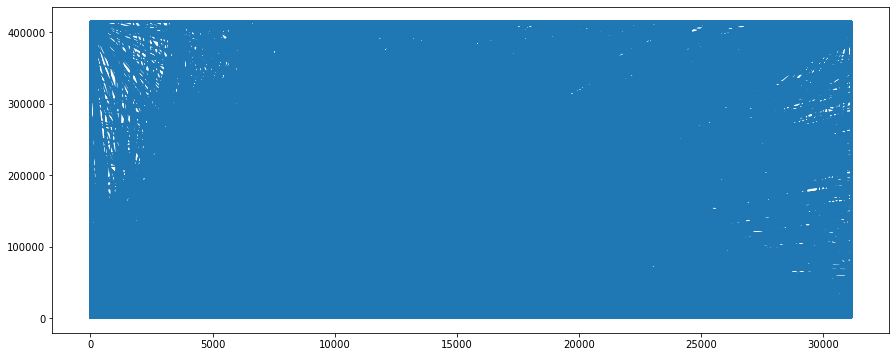

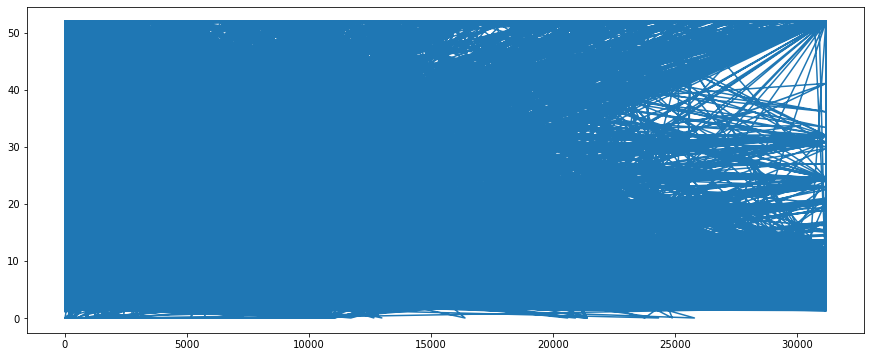

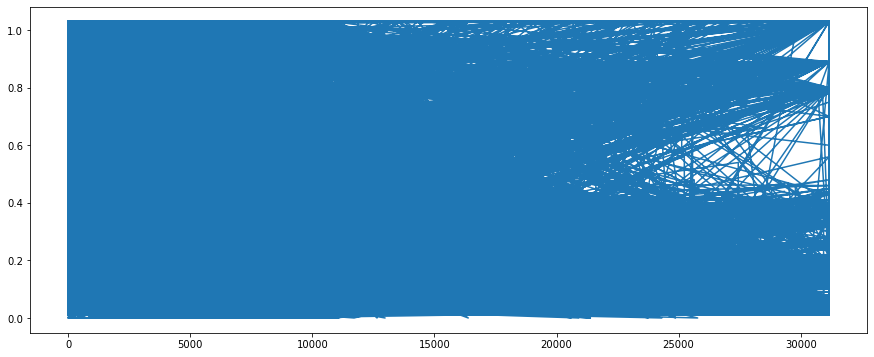

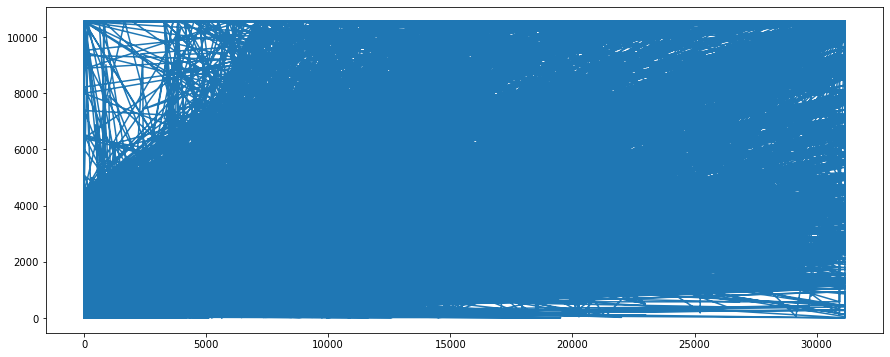

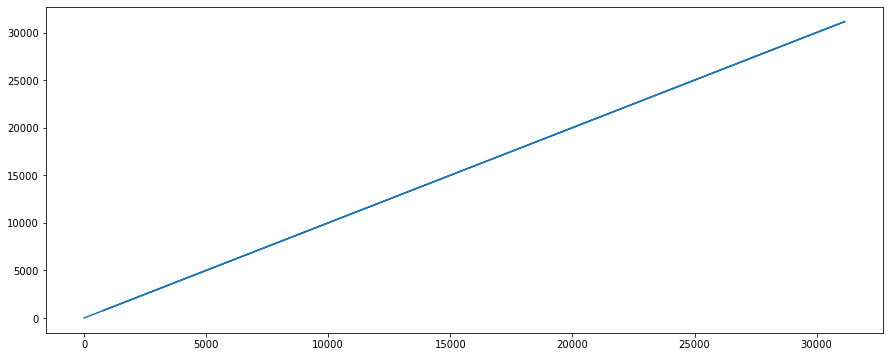

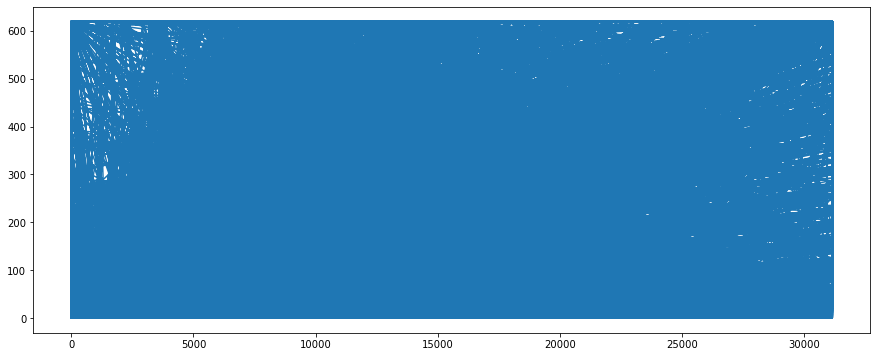

In [15]:
plt.rcParams["figure.figsize"] = (15,6)
for i in num_df.columns:
    plt.plot(num_df['Freight Cost (USD)'],num_df[i])
    plt.show()